## Required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market., using Ridge and Lasso Regression

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


### 1. Data Understanding and Exploration and Cleaning the Data

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale,PolynomialFeatures,MinMaxScaler
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV,train_test_split,KFold
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('./train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Setting the Id as the index
df.set_index(keys='Id',inplace=True)

In [4]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.shape

(1460, 80)

In [6]:
# Getting the null values in each column
nullCheck = lambda :df.isnull().sum().sort_values(ascending=False)

In [7]:
nullCheck()[0:10]

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
GarageCond       81
GarageType       81
dtype: int64

Below code will remove the column having 40 or more null values and removes column having a monoploy value that is a value is present more than 75 percent

In [8]:
for col in df.columns:
    if((df.shape[0]*0.4)<=(df[col].isnull().sum())):
        df.drop(columns=col,axis=1,inplace=True)
    elif ((df[col].value_counts().iloc[0])>=(df.shape[0]*.90)):
        df.drop(columns=col,axis=1,inplace=True)

In [9]:
df.shape

(1460, 56)

In [10]:
nullCheck()

LotFrontage      259
GarageType        81
GarageQual        81
GarageYrBlt       81
GarageFinish      81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
FullBath           0
HalfBath           0
BsmtFullBath       0
GrLivArea          0
BedroomAbvGr       0
KitchenQual        0
MSSubClass         0
TotRmsAbvGrd       0
Fireplaces         0
1stFlrSF           0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
2ndFlrSF           0
BsmtFinSF2         0
HeatingQC          0
TotalBsmtSF        0
LotArea            0
LotShape           0
LandContour        0
LotConfig          0
Neighborhood       0
Condition1         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
Exterior1st  

In [11]:
df['LotFrontage'].value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64

In [12]:
# Removing the LotFrontage row values whoes values are null
df = df[~df['LotFrontage'].isnull()]

In [13]:
nullCheck()

GarageFinish     74
GarageType       74
GarageYrBlt      74
GarageQual       74
BsmtFinType2     32
BsmtExposure     32
BsmtCond         31
BsmtFinType1     31
BsmtQual         31
MasVnrArea        6
HalfBath          0
MSSubClass        0
FullBath          0
BsmtFullBath      0
GrLivArea         0
2ndFlrSF          0
BedroomAbvGr      0
Fireplaces        0
KitchenQual       0
TotRmsAbvGrd      0
HeatingQC         0
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
1stFlrSF          0
BsmtFinSF2        0
TotalBsmtSF       0
BsmtUnfSF         0
LotFrontage       0
LotArea           0
LotShape          0
LandContour       0
LotConfig         0
Neighborhood      0
Condition1        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
Exterior1st       0
Exterior2nd       0


In [14]:
for i in nullCheck().iloc[0:5].index:
    print(df[i].value_counts())

GarageFinish
Unf    505
RFn    340
Fin    282
Name: count, dtype: int64
GarageType
Attchd     694
Detchd     340
BuiltIn     65
Basment     15
CarPort      8
2Types       5
Name: count, dtype: int64
GarageYrBlt
2005.0    65
2006.0    59
2007.0    48
2004.0    46
2003.0    43
          ..
1906.0     1
1934.0     1
1942.0     1
1927.0     1
1933.0     1
Name: count, Length: 97, dtype: int64
GarageQual
TA    1064
Fa      46
Gd      11
Ex       3
Po       3
Name: count, dtype: int64
BsmtFinType2
Unf    1043
Rec      38
LwQ      35
BLQ      26
GLQ      14
ALQ      13
Name: count, dtype: int64


In [15]:
# Removing the GarageYrBlt null values in whole data frame
df = df[~df['GarageYrBlt'].isnull()]

In [16]:
nullCheck()

BsmtFinType2     25
BsmtExposure     25
BsmtFinType1     24
BsmtCond         24
BsmtQual         24
MasVnrArea        6
MSSubClass        0
TotRmsAbvGrd      0
2ndFlrSF          0
GrLivArea         0
BsmtFullBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenQual       0
Fireplaces        0
HeatingQC         0
GarageType        0
GarageYrBlt       0
GarageFinish      0
GarageCars        0
GarageArea        0
GarageQual        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
1stFlrSF          0
BsmtFinSF2        0
TotalBsmtSF       0
BsmtUnfSF         0
LotFrontage       0
LotArea           0
LotShape          0
LandContour       0
LotConfig         0
Neighborhood      0
Condition1        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
Exterior1st       0
Exterior2nd       0


In [17]:
df['MasVnrArea'].value_counts()

MasVnrArea
0.0      659
16.0       7
108.0      7
72.0       6
80.0       6
        ... 
89.0       1
285.0      1
921.0      1
762.0      1
119.0      1
Name: count, Length: 282, dtype: int64

In [18]:
df['MasVnrArea'].describe()

count    1121.000000
mean      108.487957
std       189.500966
min         0.000000
25%         0.000000
50%         0.000000
75%       170.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [19]:
df['MasVnrArea'].quantile([0.7,0.9,1])

0.7     120.0
0.9     340.0
1.0    1600.0
Name: MasVnrArea, dtype: float64

In [20]:
# Getting the numeic values
numericColumn = df._get_numeric_data().columns

In [21]:
df.loc[df['MasVnrArea'].isnull(),'MasVnrArea'] = 0

In [22]:
numericColumn

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [23]:
df.shape

(1127, 56)

In [24]:
nullCheck()

BsmtFinType2     25
BsmtExposure     25
BsmtFinType1     24
BsmtCond         24
BsmtQual         24
MSSubClass        0
HeatingQC         0
2ndFlrSF          0
GrLivArea         0
BsmtFullBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Fireplaces        0
GarageType        0
GarageYrBlt       0
GarageFinish      0
GarageCars        0
GarageArea        0
GarageQual        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
1stFlrSF          0
BsmtFinSF2        0
TotalBsmtSF       0
OverallCond       0
LotFrontage       0
LotArea           0
LotShape          0
LandContour       0
LotConfig         0
Neighborhood      0
Condition1        0
BldgType          0
HouseStyle        0
OverallQual       0
YearBuilt         0
BsmtUnfSF         0
YearRemodAdd      0
RoofStyle         0
Exterior1st       0
Exterior2nd       0
MasVnrArea        0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1127 entries, 1 to 1460
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1127 non-null   int64  
 1   MSZoning       1127 non-null   object 
 2   LotFrontage    1127 non-null   float64
 3   LotArea        1127 non-null   int64  
 4   LotShape       1127 non-null   object 
 5   LandContour    1127 non-null   object 
 6   LotConfig      1127 non-null   object 
 7   Neighborhood   1127 non-null   object 
 8   Condition1     1127 non-null   object 
 9   BldgType       1127 non-null   object 
 10  HouseStyle     1127 non-null   object 
 11  OverallQual    1127 non-null   int64  
 12  OverallCond    1127 non-null   int64  
 13  YearBuilt      1127 non-null   int64  
 14  YearRemodAdd   1127 non-null   int64  
 15  RoofStyle      1127 non-null   object 
 16  Exterior1st    1127 non-null   object 
 17  Exterior2nd    1127 non-null   object 
 18  MasVnrArea   

In [26]:
nonNumbericValues = [i for i  in df.columns if i not in df._get_numeric_data().columns]
len(nonNumbericValues)

26

In [27]:
nullCheck()

BsmtFinType2     25
BsmtExposure     25
BsmtFinType1     24
BsmtCond         24
BsmtQual         24
MSSubClass        0
HeatingQC         0
2ndFlrSF          0
GrLivArea         0
BsmtFullBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Fireplaces        0
GarageType        0
GarageYrBlt       0
GarageFinish      0
GarageCars        0
GarageArea        0
GarageQual        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
1stFlrSF          0
BsmtFinSF2        0
TotalBsmtSF       0
OverallCond       0
LotFrontage       0
LotArea           0
LotShape          0
LandContour       0
LotConfig         0
Neighborhood      0
Condition1        0
BldgType          0
HouseStyle        0
OverallQual       0
YearBuilt         0
BsmtUnfSF         0
YearRemodAdd      0
RoofStyle         0
Exterior1st       0
Exterior2nd       0
MasVnrArea        0


In [28]:
df['MasVnrArea'].info()

<class 'pandas.core.series.Series'>
Index: 1127 entries, 1 to 1460
Series name: MasVnrArea
Non-Null Count  Dtype  
--------------  -----  
1127 non-null   float64
dtypes: float64(1)
memory usage: 17.6 KB


In [29]:
df['BsmtExposure']

Id
1       No
2       Gd
3       Mn
4       No
5       Av
        ..
1456    No
1457    No
1458    No
1459    Mn
1460    No
Name: BsmtExposure, Length: 1127, dtype: object

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - .
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

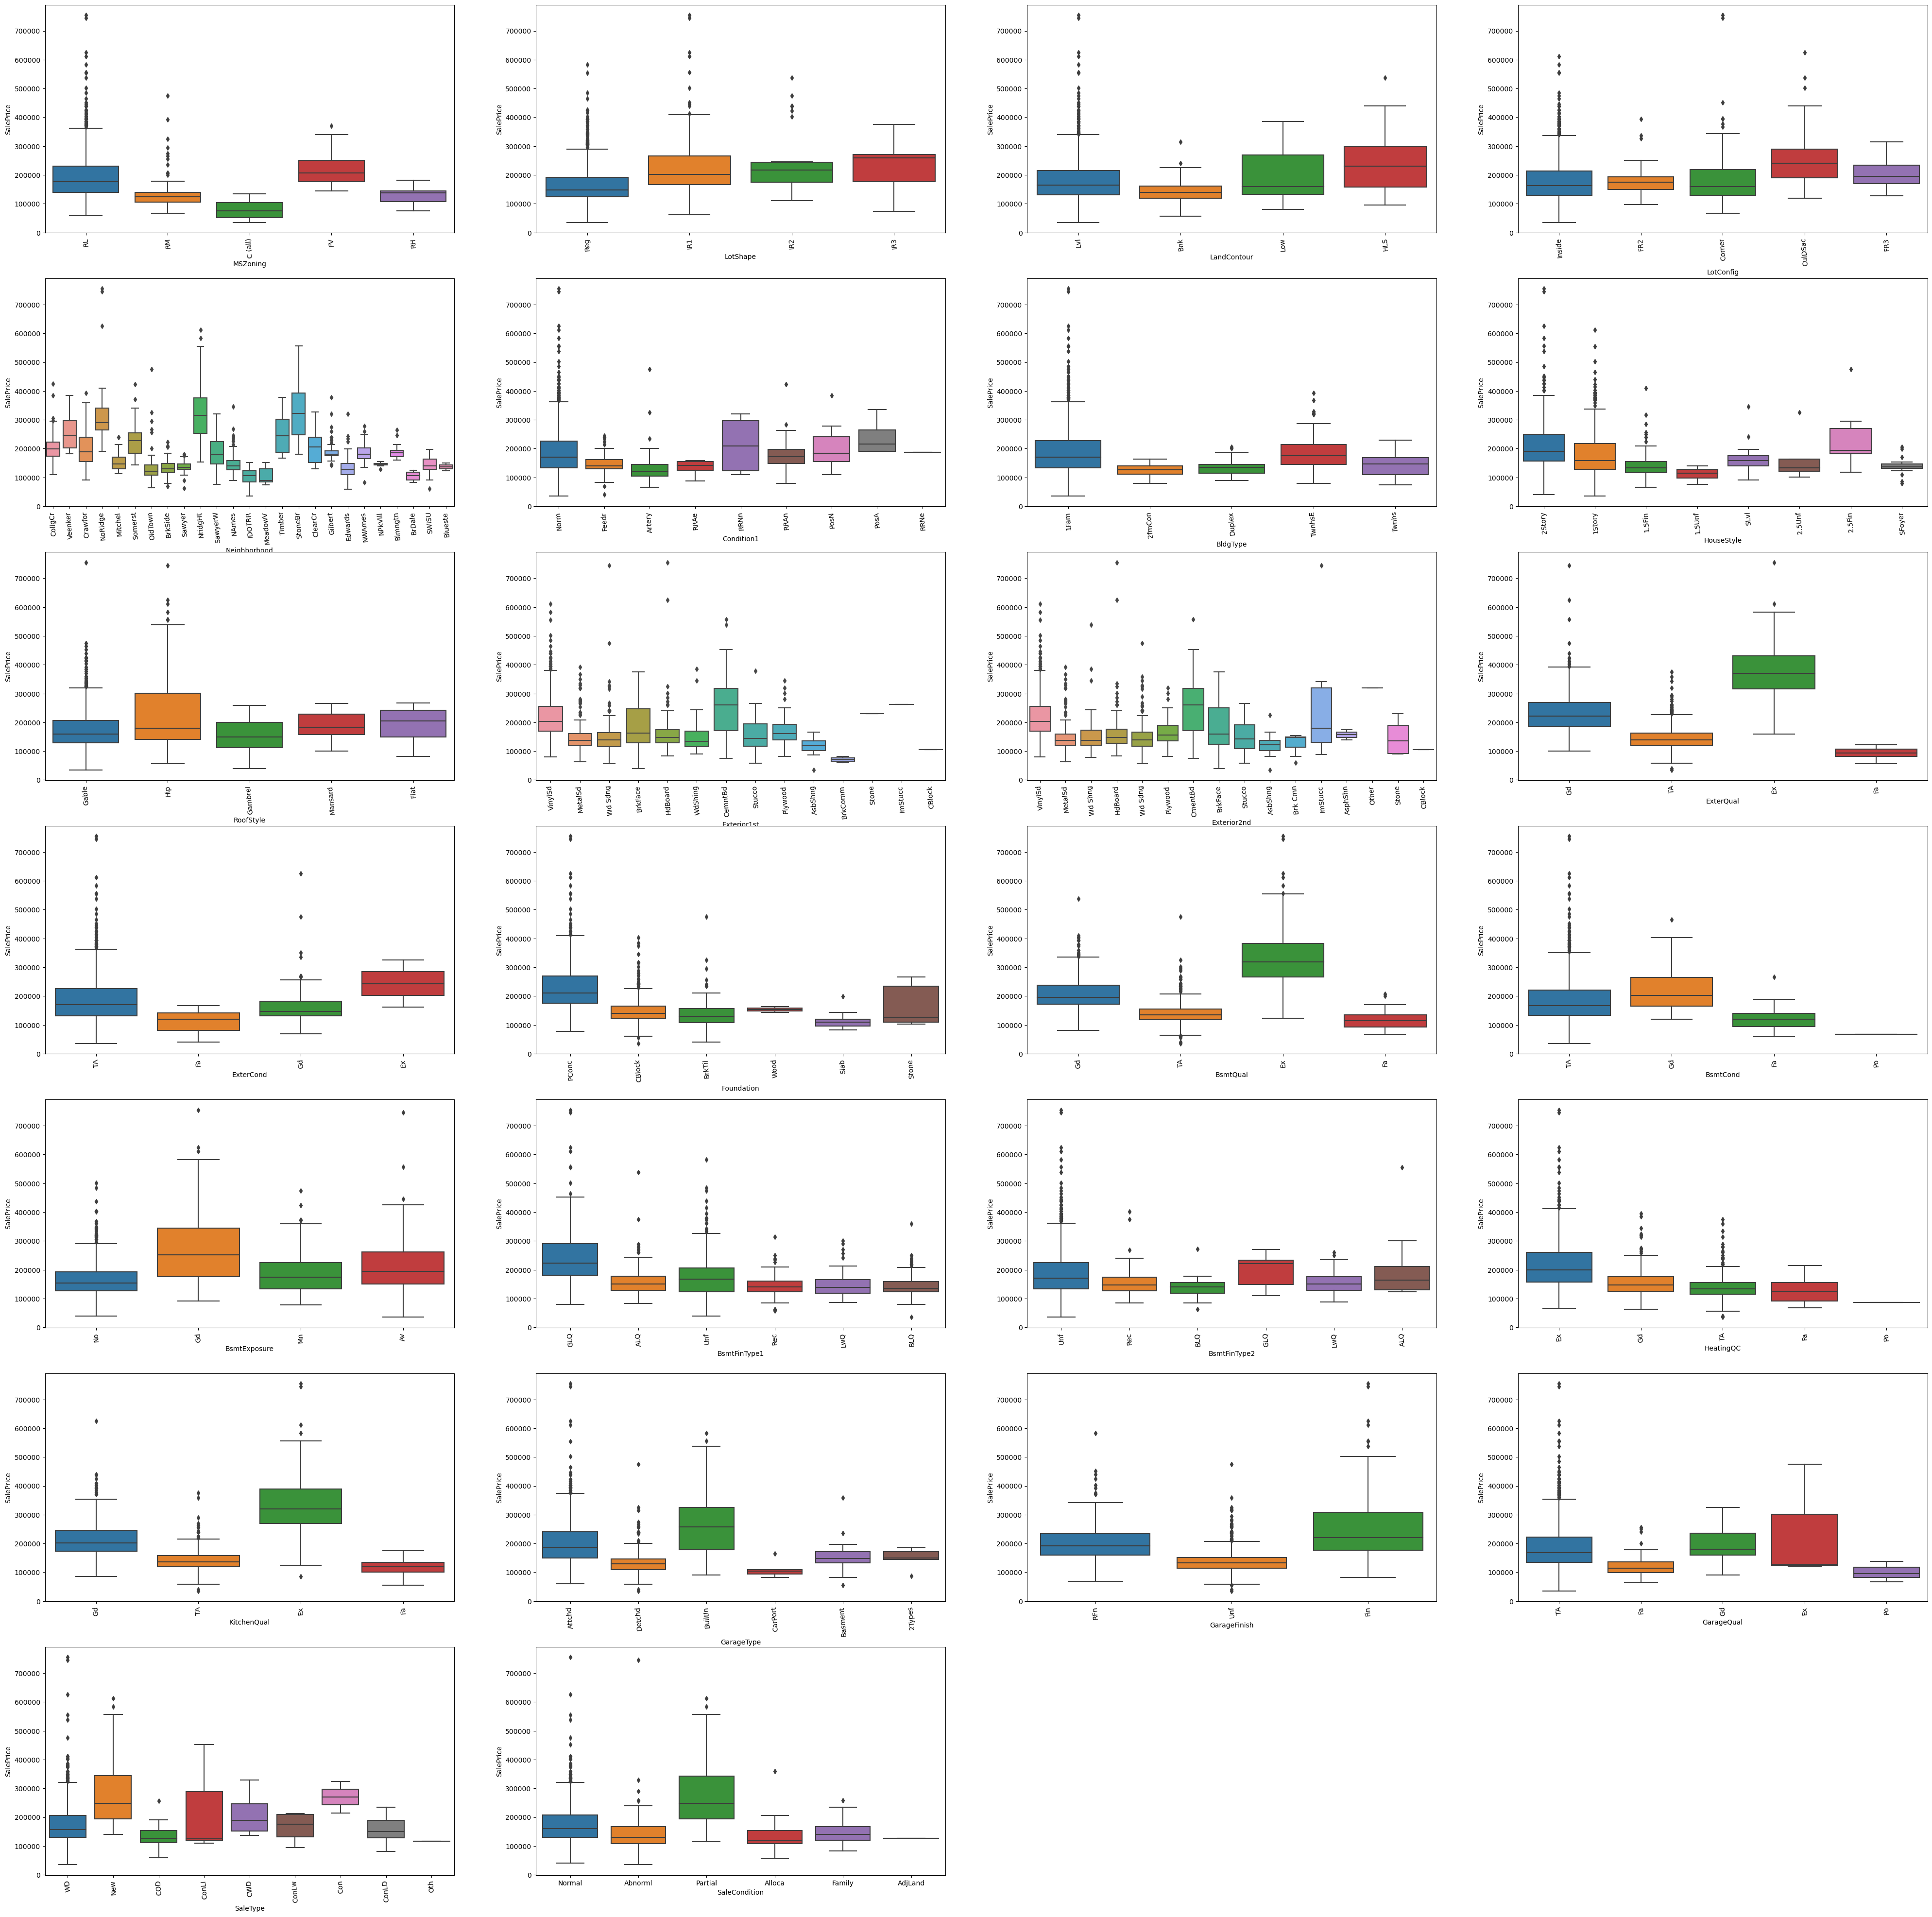

In [30]:
plt.figure(figsize=(50,50))
nonNumbericValues
for col in  nonNumbericValues:
    plt.xticks(rotation=95) 
    plt.subplot(7,4,nonNumbericValues.index(col)+1)
    sns.boxplot(x =df[col],y =df['SalePrice'] )

### In the above we have plotted the non catergorical data with sales price 
    - For Lot Config agaist sales price it gradully increase frontage propietes
    - In Garage Type as Excellent have high sales prce
    - Garage finish Attached and Built in have high Sales price 
    - Kichet Quality defines sales prce has it should be in excellent conditon and gradually decrease with its condition
    - And House style also depends for the sales price

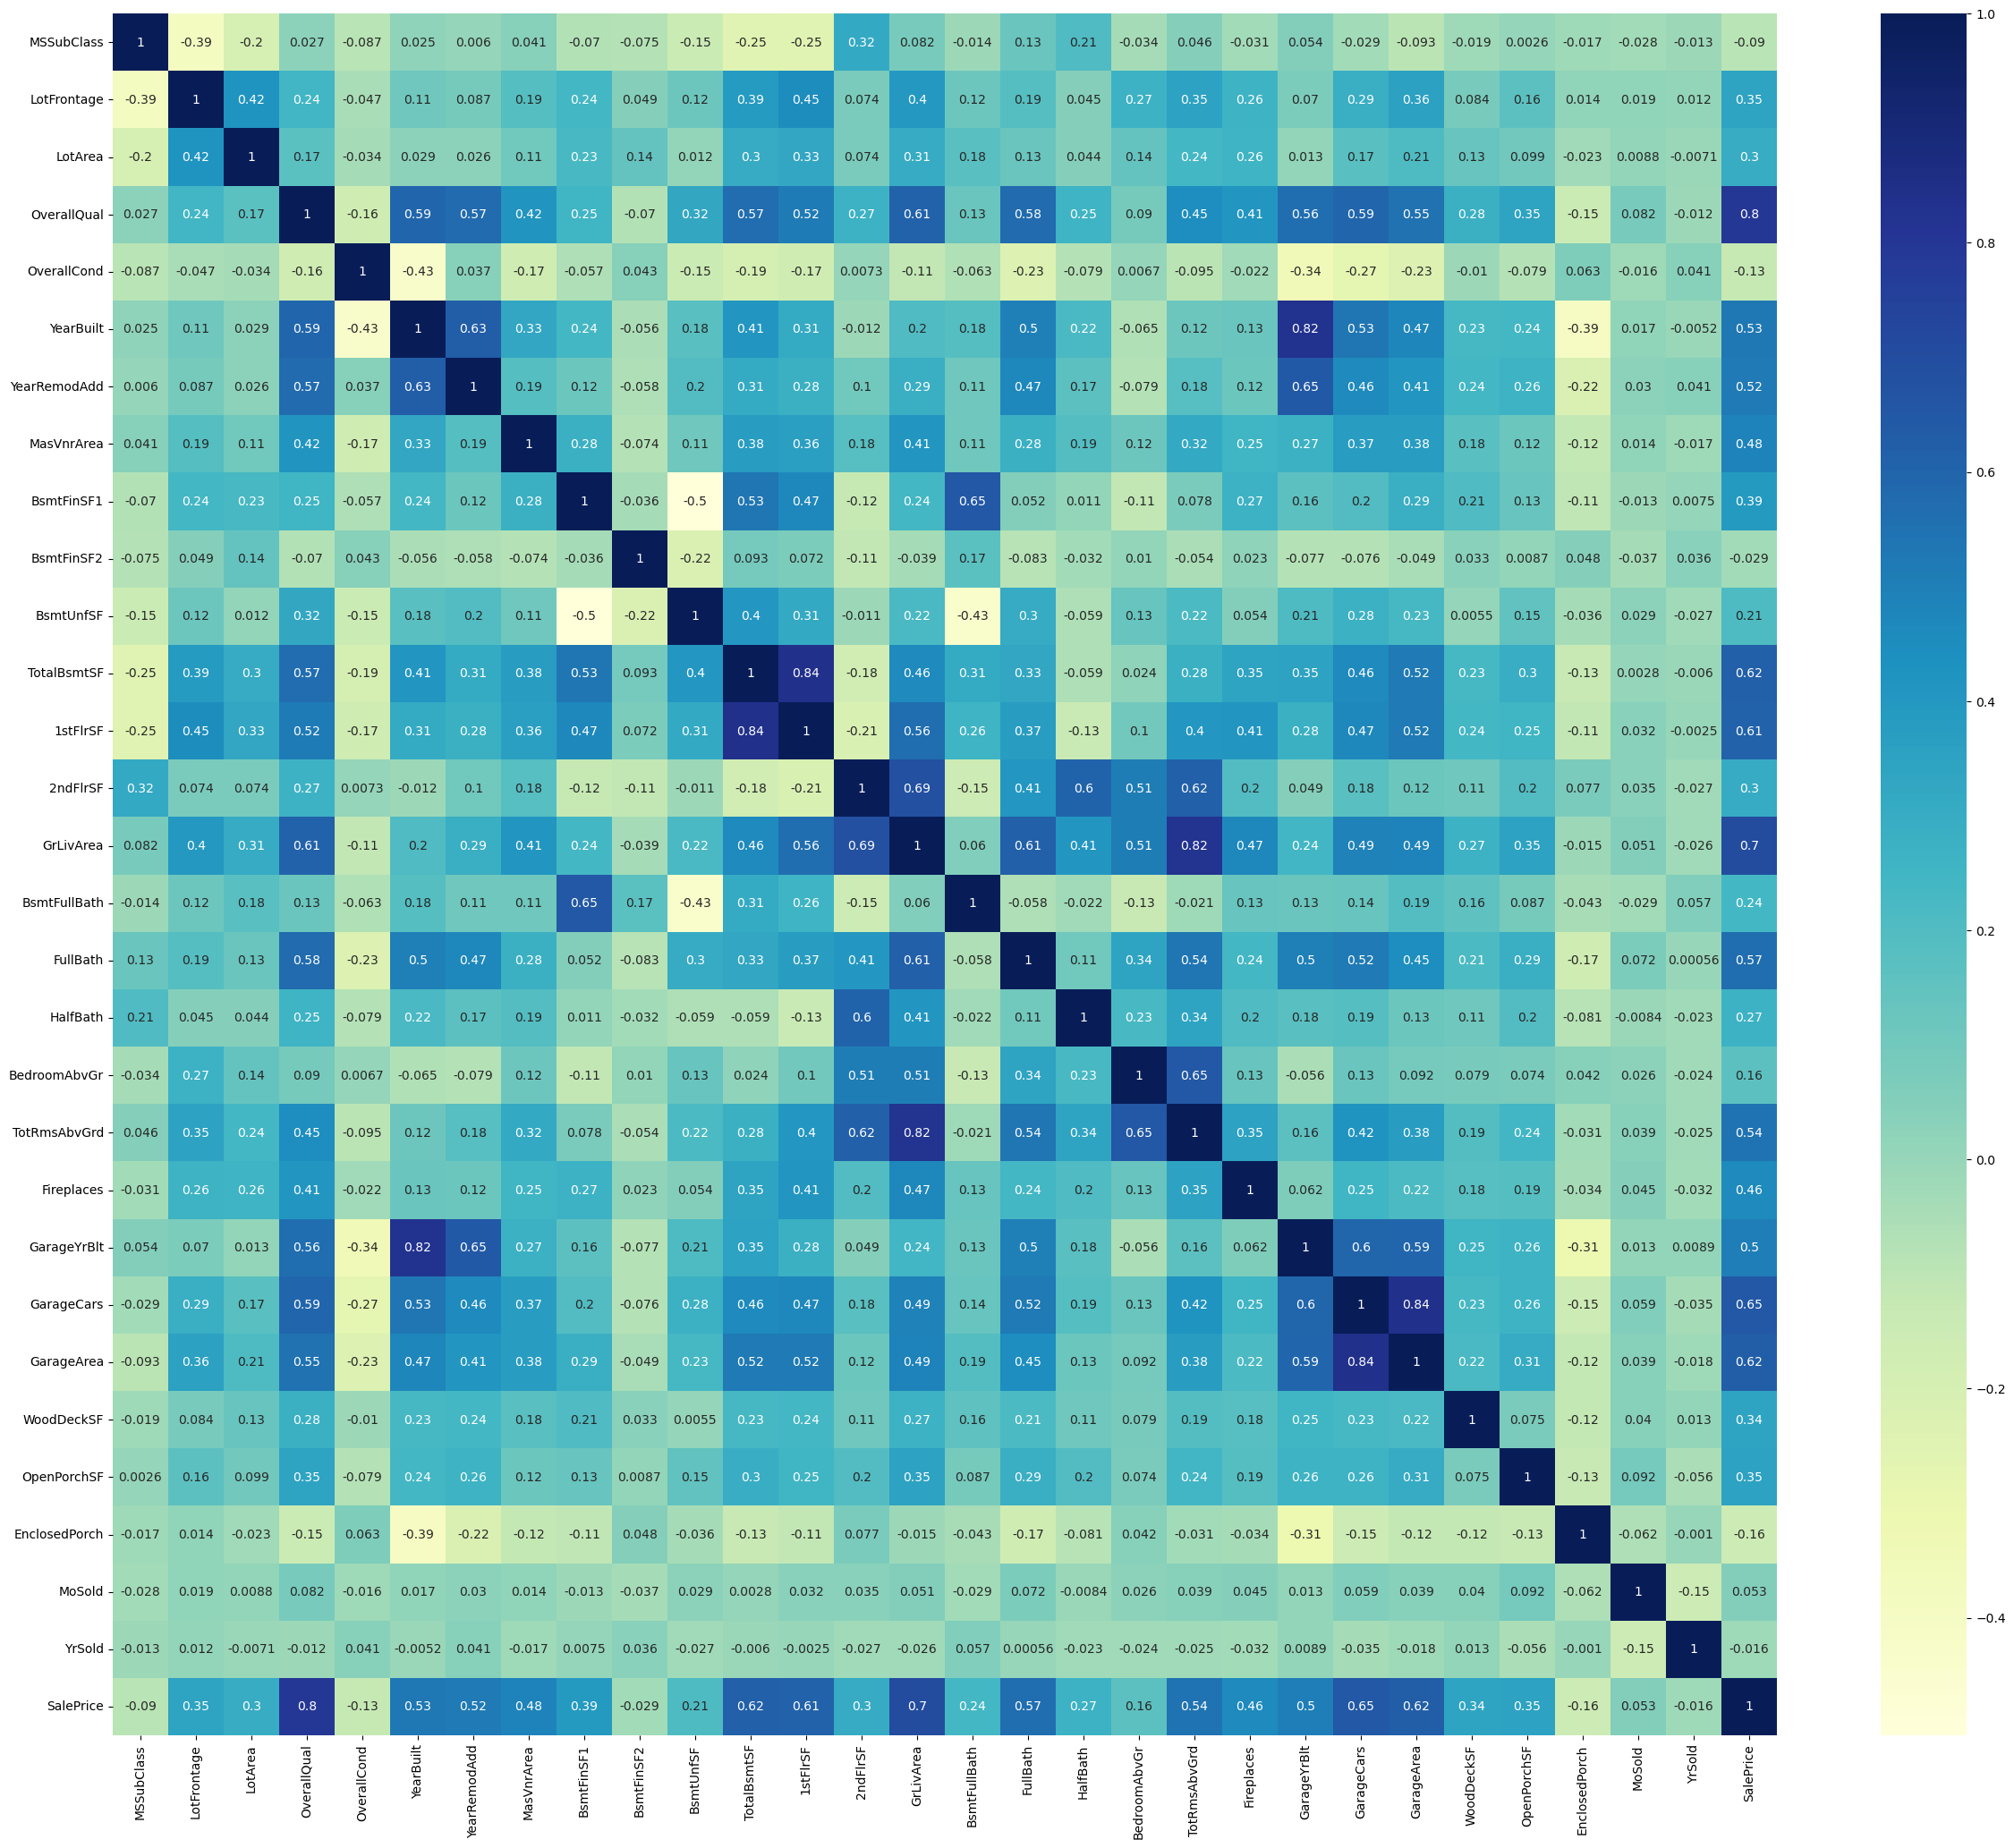

In [31]:
plt.figure(figsize=(30, 25))
sns.heatmap(data = df[numericColumn].corr(), cmap='YlGnBu', annot=True)
plt.show()

The heatmap shows some useful insights:

Correlation of price with independent variables:
- SalesPrice is highly (positively) correlated with GarageArea, 1stFlrSF, OverallQual, GarageCars, TotalBsmtSF

- SalePrice is negatively correlated to ```MSSubClass``` and ```YrSold``` there not much negativity in its score but are considered to be negativily corelated
Correlation among independent variables:
- We can also see other varaibles like YrBuilt and GarageYrBlt are very co related 1stFlrSF and TotRmsAbvGrd.

<Axes: xlabel='GarageArea', ylabel='Density'>

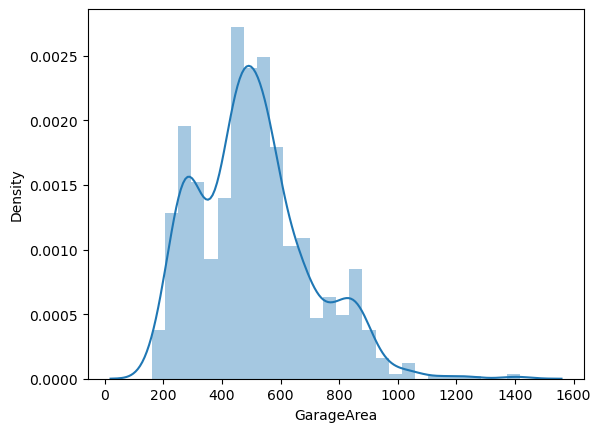

In [32]:
sns.distplot(df['GarageArea'])

<Axes: xlabel='GrLivArea', ylabel='Density'>

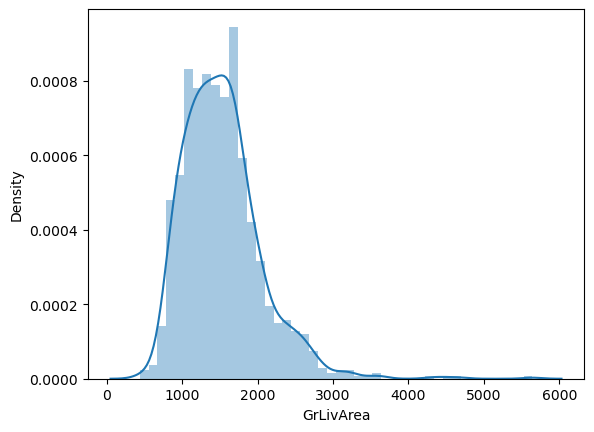

In [33]:
sns.distplot(df['GrLivArea'])

<Axes: xlabel='SalePrice', ylabel='Density'>

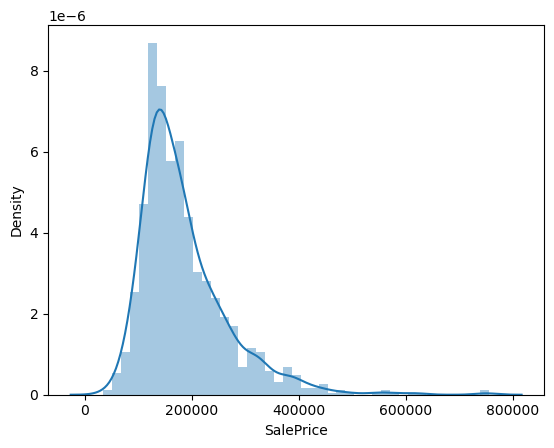

In [34]:
sns.distplot(df['SalePrice'])

## Step 3: Data Preparation

Lets combine the two columns and create a new column that is year built and year sold 

In [35]:
df['AgePropery']= df['YrSold']-df['YearBuilt']

In [36]:
df.drop(columns=['YrSold','YearBuilt'],axis=1,inplace=True)

In [37]:
df['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    422
MetalSd    172
Wd Sdng    148
HdBoard    142
Plywood     87
CmentBd     47
Wd Shng     29
BrkFace     21
Stucco      20
AsbShng     15
ImStucc      9
Brk Cmn      7
Stone        4
AsphShn      2
Other        1
CBlock       1
Name: count, dtype: int64

#### From Data visulization we could see the facitor had some chane to the Salespice VinylSd,CmentBd,ImStucc but rest had no numch change they hasd same value so we are changing those values to others


In [38]:
df['Exterior2nd'] = df['Exterior2nd'].apply( lambda x: 'Others' if x not in ['VinylSd','CmentBd','ImStucc'] else x)

In [39]:
df.shape

(1127, 55)

lets do the same for Exterior1st

Creating dummies for the categorical variables

In [40]:
df['Exterior1st'] = df['Exterior1st'].apply( lambda x: 'Others' if x not in ['VinylSd','CmentBd','ImStucc','Stone'] else x)

In [41]:
df['Exterior1st'].value_counts()

Exterior1st
Others     694
VinylSd    431
Stone        1
ImStucc      1
Name: count, dtype: int64

In [42]:
for col in nonNumbericValues:
    # if len(df[col].value_counts())<=15:
    dummiesColumn = pd.get_dummies(df[col],drop_first=True).apply(lambda x:x.map({True:1,False:0}))
    for column in dummiesColumn.columns:
        dummiesColumn.rename(columns={column:col+"_"+str(column)},inplace=True)
    dummiesColumn.astype(int)
    df = pd.concat([df,dummiesColumn],axis=1)
    df.drop(col,axis=1,inplace=True)

In [43]:
# scalar = MinMaxScaler()
# df = scalar.fit_transform(df)

In [44]:
X = df.drop('SalePrice',axis=1)
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
2,20,80.0,9600,6,8,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
3,60,68.0,11250,7,5,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
4,70,60.0,9550,7,5,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,2000,0.0,0,0,953,...,0,0,0,0,1,0,0,0,1,0
1457,20,85.0,13175,6,6,1988,119.0,790,163,589,...,0,0,0,0,1,0,0,0,1,0
1458,70,66.0,9042,7,9,2006,0.0,275,0,877,...,0,0,0,0,1,0,0,0,1,0


In [45]:
y = df['SalePrice']

In [46]:
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
scalar = MinMaxScaler()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

## 
Model Building and Evaluation

In [48]:
lm = LinearRegression()

In [49]:
def calculate(y_train, y_train_pred,y_test_pred):
    metric = []
    r2_train_lr = r2_score(y_train, y_train_pred)
    print(r2_train_lr)
    metric.append(r2_train_lr)

    r2_test_lr = r2_score(y_test, y_test_pred)
    print(r2_test_lr)
    metric.append(r2_test_lr)

    rss1_lr = np.sum(np.square(y_train - y_train_pred))
    print(rss1_lr)
    metric.append(rss1_lr)

    rss2_lr = np.sum(np.square(y_test - y_test_pred))
    print(rss2_lr)
    metric.append(rss2_lr)

    mse_train_lr = mean_squared_error(y_train, y_train_pred)
    print(mse_train_lr)
    metric.append(mse_train_lr**0.5)

    mse_test_lr = mean_squared_error(y_test, y_test_pred)
    print(mse_test_lr)
    metric.append(mse_test_lr**0.5)
    return metric

In [50]:
lm.fit(X_train,y_train)

LinearRegression()

In [51]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

In [52]:
metric =  calculate(y_train,y_pred_train,y_pred_test)

0.8982295783557248
-1.604691869233558e+23
551781915143.4893
3.805918392478786e+35
700230856.7810777
1.1226897912916773e+33


In [53]:
# fit multiple polynomial features
degrees = [1, 2]
for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print("For the degree ",degree)
    calculate(y_train, y_train_pred,y_test_pred)


For the degree  1
0.9065814026661628
-5.701223621099761e+19
506499744366.3706
1.3521843199431052e+32
642766173.0537698
3.9887443066168296e+29
For the degree  2
1.0
0.7721547883130465
2.579673780972046e-16
540390525074.3102
3.273697691588891e-19
1594072345.3519475


From the above model we can conclude that there is large amount of deffrence in pred and actual valeue that is trained byy the model
We can clearly view the data is getting overfitted


## Ridge and Lasso Regression

Let's now try predicting Sales prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

In [54]:
hyper_params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [55]:
#create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)


# GridSearchCV()
modelRidge = GridSearchCV(estimator = Ridge(), 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
modelRidge.fit(X_train, y_train)         

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [56]:
# getting the best paramas value
modelRidge.best_params_

{'alpha': 6.0}

In [57]:
# Applying the ridge for getting the least coffient
ridge = Ridge(alpha=modelRidge.best_params_['alpha'])
ridge.fit(X_train, y_train)
print(ridge.coef_)

[-18391.05619678  -8818.05522944  20233.26701261  54877.58799226
  25538.05242539   9477.35102128  22631.27330704   9138.30337212
   3445.24180045  17722.17072711  15321.63753139  31482.98296696
  49864.3109786   45414.79667519  12708.41940534  37563.7659938
  15365.35964107   7857.58776546  21647.95212109  16154.47086365
  -5887.49628729  32045.95177917  11765.11301988  20125.23265167
   7156.22262345  -6859.52478401   2312.09028563  -3688.204124
   7214.31807346  -2871.14410416  11125.89583095   6496.3234456
   1930.54660248 -25405.00977128  -4061.8198696    8934.93980279
   -914.90985894   9457.73023648  20085.93716494  -9354.23585648
  -4510.21778757  -3078.87940299      0.          -1710.46999259
   2815.99279837  -3366.42094437  -6836.7326035   23595.20815218
 -19570.21830224 -10657.35674216  -1699.15360738 -17029.77828875
 -11917.63308352  -5748.79150407    101.80993519  -9202.8514784
  43492.07335899  15520.7131557   -9239.95274226  -6697.19512729
  -5728.11158201   1457.959589

In [58]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [59]:
calculate(y_train,y_pred_train,y_pred_test)

0.887930886610996
0.8243003660942148
607619669989.8024
416714561252.93713
771090951.7637086
1229246493.371496


[0.887930886610996,
 0.8243003660942148,
 607619669989.8024,
 416714561252.93713,
 27768.52447941209,
 35060.611708461336]

We can conclude the r2 is far more better when compared to linear regression where we can clearly see the data was completely overfitting"

In [60]:
np.linspace(2,5,20)

array([2.        , 2.15789474, 2.31578947, 2.47368421, 2.63157895,
       2.78947368, 2.94736842, 3.10526316, 3.26315789, 3.42105263,
       3.57894737, 3.73684211, 3.89473684, 4.05263158, 4.21052632,
       4.36842105, 4.52631579, 4.68421053, 4.84210526, 5.        ])

In [61]:
modelRidge = GridSearchCV(estimator = Ridge(), 
                        param_grid = { 'alpha':np.linspace(2,4,30)}, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
modelRidge.fit(X_train, y_train) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': array([2.        , 2.06896552, 2.13793103, 2.20689655, 2.27586207,
       2.34482759, 2.4137931 , 2.48275862, 2.55172414, 2.62068966,
       2.68965517, 2.75862069, 2.82758621, 2.89655172, 2.96551724,
       3.03448276, 3.10344828, 3.17241379, 3.24137931, 3.31034483,
       3.37931034, 3.44827586, 3.51724138, 3.5862069 , 3.65517241,
       3.72413793, 3.79310345, 3.86206897, 3.93103448, 4.        ])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [62]:
modelRidge.best_params_

{'alpha': 4.0}

In [63]:

ridge = Ridge(alpha=modelRidge.best_params_['alpha'])
ridge.fit(X_train, y_train)
print(ridge.coef_)

[-19375.37873578 -13812.73744474  24159.33987238  59137.74913465
  29095.79934935   8004.77051961  22989.41917172   8600.81707301
   4988.51691633  18440.7567149   15363.01462061  36354.82009437
  58188.20416666  52776.07559515  13253.79604696  39992.81145811
  16061.26050581   7436.48043002  18788.22250006  14195.43489663
  -7095.98538277  33419.11809731   9008.48378172  20549.25421998
   6253.52420125  -7226.19788993   2285.24670665  -3685.00620711
   9126.99059562  -2290.31189955  12533.43517951   9462.7070503
   1299.77693805 -31337.54408966  -3304.19436992  10108.84957003
   -992.14442341  10639.45147506  20158.81572408 -10705.54506743
  -5828.13589665  -2884.67603288      0.          -2605.09292301
   1713.56293235  -3474.36607887  -5395.19063044  25063.313732
 -20159.69629531  -8514.71721513  -1466.68721143 -20477.33029688
 -12739.45639875  -6057.35347628    -96.88714724 -10810.20052412
  46108.31557558  16301.70474402 -10597.71087257  -7244.65908999
  -5666.92059815   3019.5875

In [64]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [65]:
metricOfRidge =  calculate(y_train,y_pred_train,y_pred_test)

0.8930861896786849
0.8229826190438686
579668493666.907
419839919978.6235
735619915.820948
1238465840.644907


In [102]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [103]:
model_cv.best_params_

{'alpha': 100}

In [78]:
# Applying lassco to build a model
lassco = Lasso(alpha=model_cv.best_params_['alpha'])
lassco.fit(X_train, y_train)
print(lassco.coef_)

[-1.93502651e+04 -9.96705249e+03  2.07482679e+04  8.72343247e+04
  3.66436133e+04  3.14896787e+03  1.79593504e+04  0.00000000e+00
  0.00000000e+00  6.60652924e+03  0.00000000e+00  0.00000000e+00
  3.41213433e+04  1.99459957e+05  1.29626089e+04  3.39930866e+04
  1.07201714e+04  0.00000000e+00  0.00000000e+00  7.12336921e+03
 -0.00000000e+00  3.75909368e+04 -0.00000000e+00  1.71411718e+04
  0.00000000e+00 -4.83483392e+03  0.00000000e+00 -3.17065650e+03
  0.00000000e+00 -0.00000000e+00  4.98880480e+03  0.00000000e+00
  0.00000000e+00 -4.48269743e+04 -2.39022987e+03  8.46811285e+03
 -0.00000000e+00  1.19895146e+04  2.21101203e+04 -4.25108821e+03
 -0.00000000e+00 -2.53664985e+02  0.00000000e+00 -0.00000000e+00
  4.69982622e+03 -0.00000000e+00  0.00000000e+00  2.81569432e+04
 -1.45737399e+04  0.00000000e+00  0.00000000e+00 -6.42409316e+03
 -6.00776116e+03 -1.12142622e+03  0.00000000e+00 -5.34178456e+03
  4.94311244e+04  2.03007791e+04 -7.18730502e+03 -2.41177774e+03
 -0.00000000e+00  4.40919

# Here we can cloarly see the number of co-efient ae zero that more but in Ridge those data were close to zero

In [69]:
y_pred_train = lassco.predict(X_train)
y_pred_test = lassco.predict(X_test)
metricOfLasco = calculate(y_train,y_pred_train,y_pred_test)

0.893181566032885
0.8253599993400198
579151379297.8237
414201382407.31995
734963679.311959
1221832986.4522712


In [70]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metricOfRidge, name = 'Ridge Regression')
ls_metric = pd.Series(metricOfLasco, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.982296e-01,8.930862e-01,8.931816e-01
1,R2 Score (Test),-1.604692e+23,8.229826e-01,8.253600e-01
2,RSS (Train),5.517819e+11,5.796685e+11,5.791514e+11
3,RSS (Test),3.805918e+35,4.198399e+11,4.142014e+11
4,MSE (Train),2.646188e+04,2.712231e+04,2.711021e+04
5,MSE (Test),3.350656e+16,3.519184e+04,3.495473e+04


## From the above we will conclude

In [71]:
X.columns[lassco.coef_ > 0]

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea',
       'BsmtUnfSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'MSZoning_RL',
       'LandContour_HLS', 'LandContour_Lvl', 'LotConfig_CulDSac',
       'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Norm',
       'Condition1_RRAn', 'HouseStyle_1Story', 'HouseStyle_SFoyer',
       'RoofStyle_Hip', 'Exterior1st_Others', 'Exterior2nd_ImStucc',
       'Foundation_CBlock', 'Foundation_PConc', 'BsmtCond_Gd', 'BsmtCond_TA',
       'BsmtExposure_Gd', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ',
       'BsmtFinType2_LwQ', 'BsmtFinType2_Unf', 'HeatingQC_Fa',
       'GarageType_BuiltIn', 'GarageType_Detchd', 'SaleType_New'],
      dtype='object')

### The abve columnn contribution is done on positive 

In [72]:
# this provide all columns with negative impact
X.columns[lassco.coef_ < 0]

Index(['MSSubClass', 'LotFrontage', 'EnclosedPorch', 'AgePropery',
       'LotShape_IR3', 'LotShape_Reg', 'LotConfig_FR2', 'LotConfig_Inside',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Condition1_Feedr', 'BldgType_Duplex',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_2Story',
       'Exterior2nd_Others', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA',
       'ExterCond_Gd', 'Foundation_Slab', 'BsmtQual_Fa', 'BsmtQual_Gd',
       'BsmtQual_TA', 'BsmtExposure_No', 'BsmtFinType1_LwQ',
       'BsmtFinType1_Unf', 'HeatingQC_TA', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'GarageFinish_RFn', 'GarageFinish_Unf',
       'GarageQual_Fa', 'SaleType_WD'],
      dtype='object')

In [73]:
# this will provide the columns with no impact on salesprice
X.columns[lassco.coef_ == 0]

Index(['BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'OpenPorchSF', 'MoSold',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM', 'LotShape_IR2',
       'LandContour_Low', 'LotConfig_FR3', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_NPkVill',
       'Neighborhood_Sawyer', 'Neighborhood_Timber', 'Condition1_PosA',
       'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRNe',
       'Condition1_RRNn', 'BldgType_2fmCon', 'HouseStyle_1.5Unf',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_SLvl',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Mansard',
       'Exterior1st_Stone', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd',
       'ExterCond_Fa', 'ExterCond_TA', 'Foundation_Stone', 'Foundation_Wood',
       'BsmtCond_Po', 'BsmtExposure_Mn', 'BsmtFinType1_Rec',
   

In [74]:
df1= pd.DataFrame({'columns':X.columns,'Co-effient':ridge.coef_})

In [75]:
df1.set_index(keys='columns',inplace=True)

In [76]:
df1.sort_values(by='Co-effient',ascending=False)

,Co-effient
columns,
OverallQual,59137.749135
2ndFlrSF,58188.204167
GrLivArea,52776.075595
Neighborhood_NoRidge,46108.315576
FullBath,39992.811458
...,...
KitchenQual_TA,-26800.189394
KitchenQual_Gd,-27469.128592
BsmtQual_Gd,-29602.143019


In [79]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            


In [91]:

df1 = df.loc [:,[i for i in df.columns if  i not in ['OverallQual',	
'2ndFlrSF',
'GrLivArea',
'Neighborhood_NoRidge',
'FullBath']]]

In [93]:
X= df1.drop('SalePrice',axis=1)

In [94]:
y= df1['SalePrice']

In [106]:
model_cv.fit(X,y)
lassco = Lasso(alpha=model_cv.best_params_['alpha'])
lassco.fit(X, y)
print(lassco.coef_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[-2.11966857e+02 -8.76735819e+01  9.33091291e-01  7.52411302e+03
  7.61351101e+01  2.74830365e+01  1.02808271e+01  1.72116072e+01
  6.57273558e+00  4.38288029e+00  3.08644534e+01  1.91487415e+03
  8.71808591e+03  2.32813531e+03  6.72323479e+03  8.39685990e+03
 -1.49849868e+00  1.69115959e+04 -1.80660842e+00  2.34649077e+01
  1.45612028e+01  8.65395722e+00 -3.81464336e+01 -2.67059044e+02
  1.67159186e+04  0.00000000e+00  4.83030813e+03 -0.00000000e+00
  7.90537375e+03 -3.80007847e+04 -6.86327787e+02  1.58444560e+04
 -0.00000000e+00  1.43729120e+04  1.62431639e+04 -8.25221735e+03
 -0.00000000e+00 -2.68876355e+03 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -1.32508828e+03 -1.10530652e+04  2.00615045e+04
 -2.53839489e+04 -1.29977030e+04 -3.86821033e+03 -1.36326050e+03
 -1.73802300e+04 -1.25123420e+04  0.00000000e+00 -1.39220707e+04
  1.96258048e+04 -4.63153367e+03 -0.00000000e+00 -9.88249640e+03
 -5.25010489e+03  0.00000000

In [107]:
df1= pd.DataFrame({'columns':X.columns,'Co-effient':lassco.coef_})

In [108]:
df1.sort_values(by='Co-effient',ascending=False)

,columns,Co-effient
58,Neighborhood_StoneBr,43733.824168
87,Exterior2nd_ImStucc,31669.843980
43,Neighborhood_Crawfor,20061.504452
52,Neighborhood_NridgHt,19625.804840
107,BsmtExposure_Gd,18300.808325
...,...,...
102,BsmtQual_Gd,-23225.226542
44,Neighborhood_Edwards,-25383.948867
125,KitchenQual_Gd,-27390.433870
126,KitchenQual_TA,-29742.891169
